In [8]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [9]:
# check for GPU availability things
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 13334614665130787981
xla_global_id: -1
]


In [10]:
import pandas as pd
# diagnosis file converted from txt to csv
diagnosis = pd.read_csv('./ICBHI/ICBHI_Challenge_diagnosis.csv')
diagnosis

ID    Symptom
0    101       URTI
1    102    Healthy
2    103     Asthma
3    104       COPD
4    105       URTI
..   ...        ...
121  222       COPD
122  223       COPD
123  224    Healthy
124  225    Healthy
125  226  Pneumonia

[126 rows x 2 columns]

In [11]:
# Find the number of instances
diag = diagnosis.to_dict()
ids=list(diag['ID'].values())
print('Number of instances: ',len(ids))
symp=list(diag['Symptom'].values())

Number of instances:  126


In [12]:
# ! conda install -c conda-forge librosay

In [13]:
# Audio feature extraction library
import librosa
import librosa.display
#file name
import glob

In [14]:
dataset_list=[]
for filename in glob.iglob('ICBHI/ICBHI_final_database/*'):
    if (filename[-4:]=='.wav'):
        identity = filename.split('/')[-1][:3]
        # print(identity)
        index=ids.index(int(identity))
        label = symp[index]
        duration = librosa.get_duration(filename=filename)
        # print(identity, label, duration)
        if duration>= 3:
            slice_size = 3
            iterations = int((duration-slice_size)/(slice_size-1))
            iterations += 1
            # initial_offset is the starting point of the recording
            initial_offset = (duration - ((iterations*(slice_size-1))+1))/2
            for i in range(iterations):
                # starting point of the slice from the initial_offset of the recording
                offset = initial_offset + i*(slice_size-1)
                dataset_list.append({"filename": filename, "label": label, "offset":offset})
                dataset = pd.DataFrame(dataset_list)
                # dataset = shuffle(dataset, random_state=42)
                dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  1 non-null      object 
 1   label     1 non-null      object 
 2   offset    1 non-null      float64
dtypes: float64(1), object(2)
memory usage: 156.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  2 non-null      object 
 1   label     2 non-null      object 
 2   offset    2 non-null      float64
dtypes: float64(1), object(2)
memory usage: 180.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  3 non-null      object 
 1   label     3 non-null      object 
 2   offset    3 non-null      float64
d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  16 non-null     object 
 1   label     16 non-null     object 
 2   offset    16 non-null     float64
dtypes: float64(1), object(2)
memory usage: 516.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  17 non-null     object 
 1   label     17 non-null     object 
 2   offset    17 non-null     float64
dtypes: float64(1), object(2)
memory usage: 540.0+ bytes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  18 non-null     object 
 1   label     18 non-null     object 
 2   offset    18 non-null     flo

In [15]:
#A dataframe with thw wav filename and labels
dataset.head()

filename      label  offset
0  ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC...  Pneumonia     0.5
1  ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC...  Pneumonia     2.5
2  ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC...  Pneumonia     4.5
3  ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC...  Pneumonia     6.5
4  ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC...  Pneumonia     8.5

In [16]:
import matplotlib.pyplot as plt

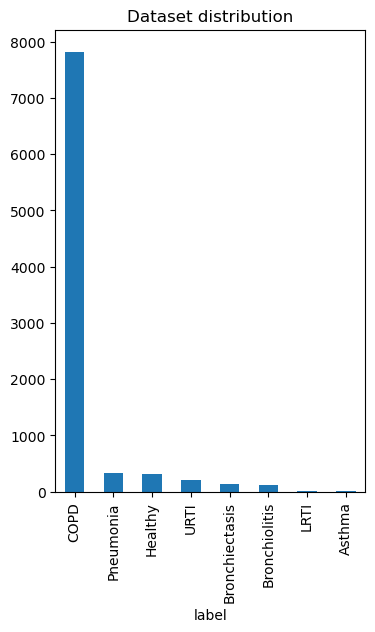

In [17]:
#Output class distribution
plt.figure(figsize=(4,6))
dataset.label.value_counts().plot(kind='bar', title="Dataset distribution")
plt.show()

In [18]:
#Split train and test data
from sklearn.model_selection import train_test_split
import numpy as np
train, test = train_test_split(dataset, test_size=0.2, random_state=42)
print("Train: %i" % len(train))
print("Test: %i" % len(test))

Train: 7172
Test: 1793


ICBHI/ICBHI_final_database/122_2b1_Tc_mc_LittC2SE.wav
ICBHI/ICBHI_final_database/113_1b1_Lr_sc_Litt3200.wav
ICBHI/ICBHI_final_database/201_1b2_Ar_sc_Meditron.wav
ICBHI/ICBHI_final_database/164_1b1_Ll_sc_Meditron.wav
ICBHI/ICBHI_final_database/202_1b1_Ar_sc_Meditron.wav
ICBHI/ICBHI_final_database/115_1b1_Ar_sc_Meditron.wav
ICBHI/ICBHI_final_database/216_1b1_Al_sc_Meditron.wav
ICBHI/ICBHI_final_database/103_2b2_Ar_mc_LittC2SE.wav


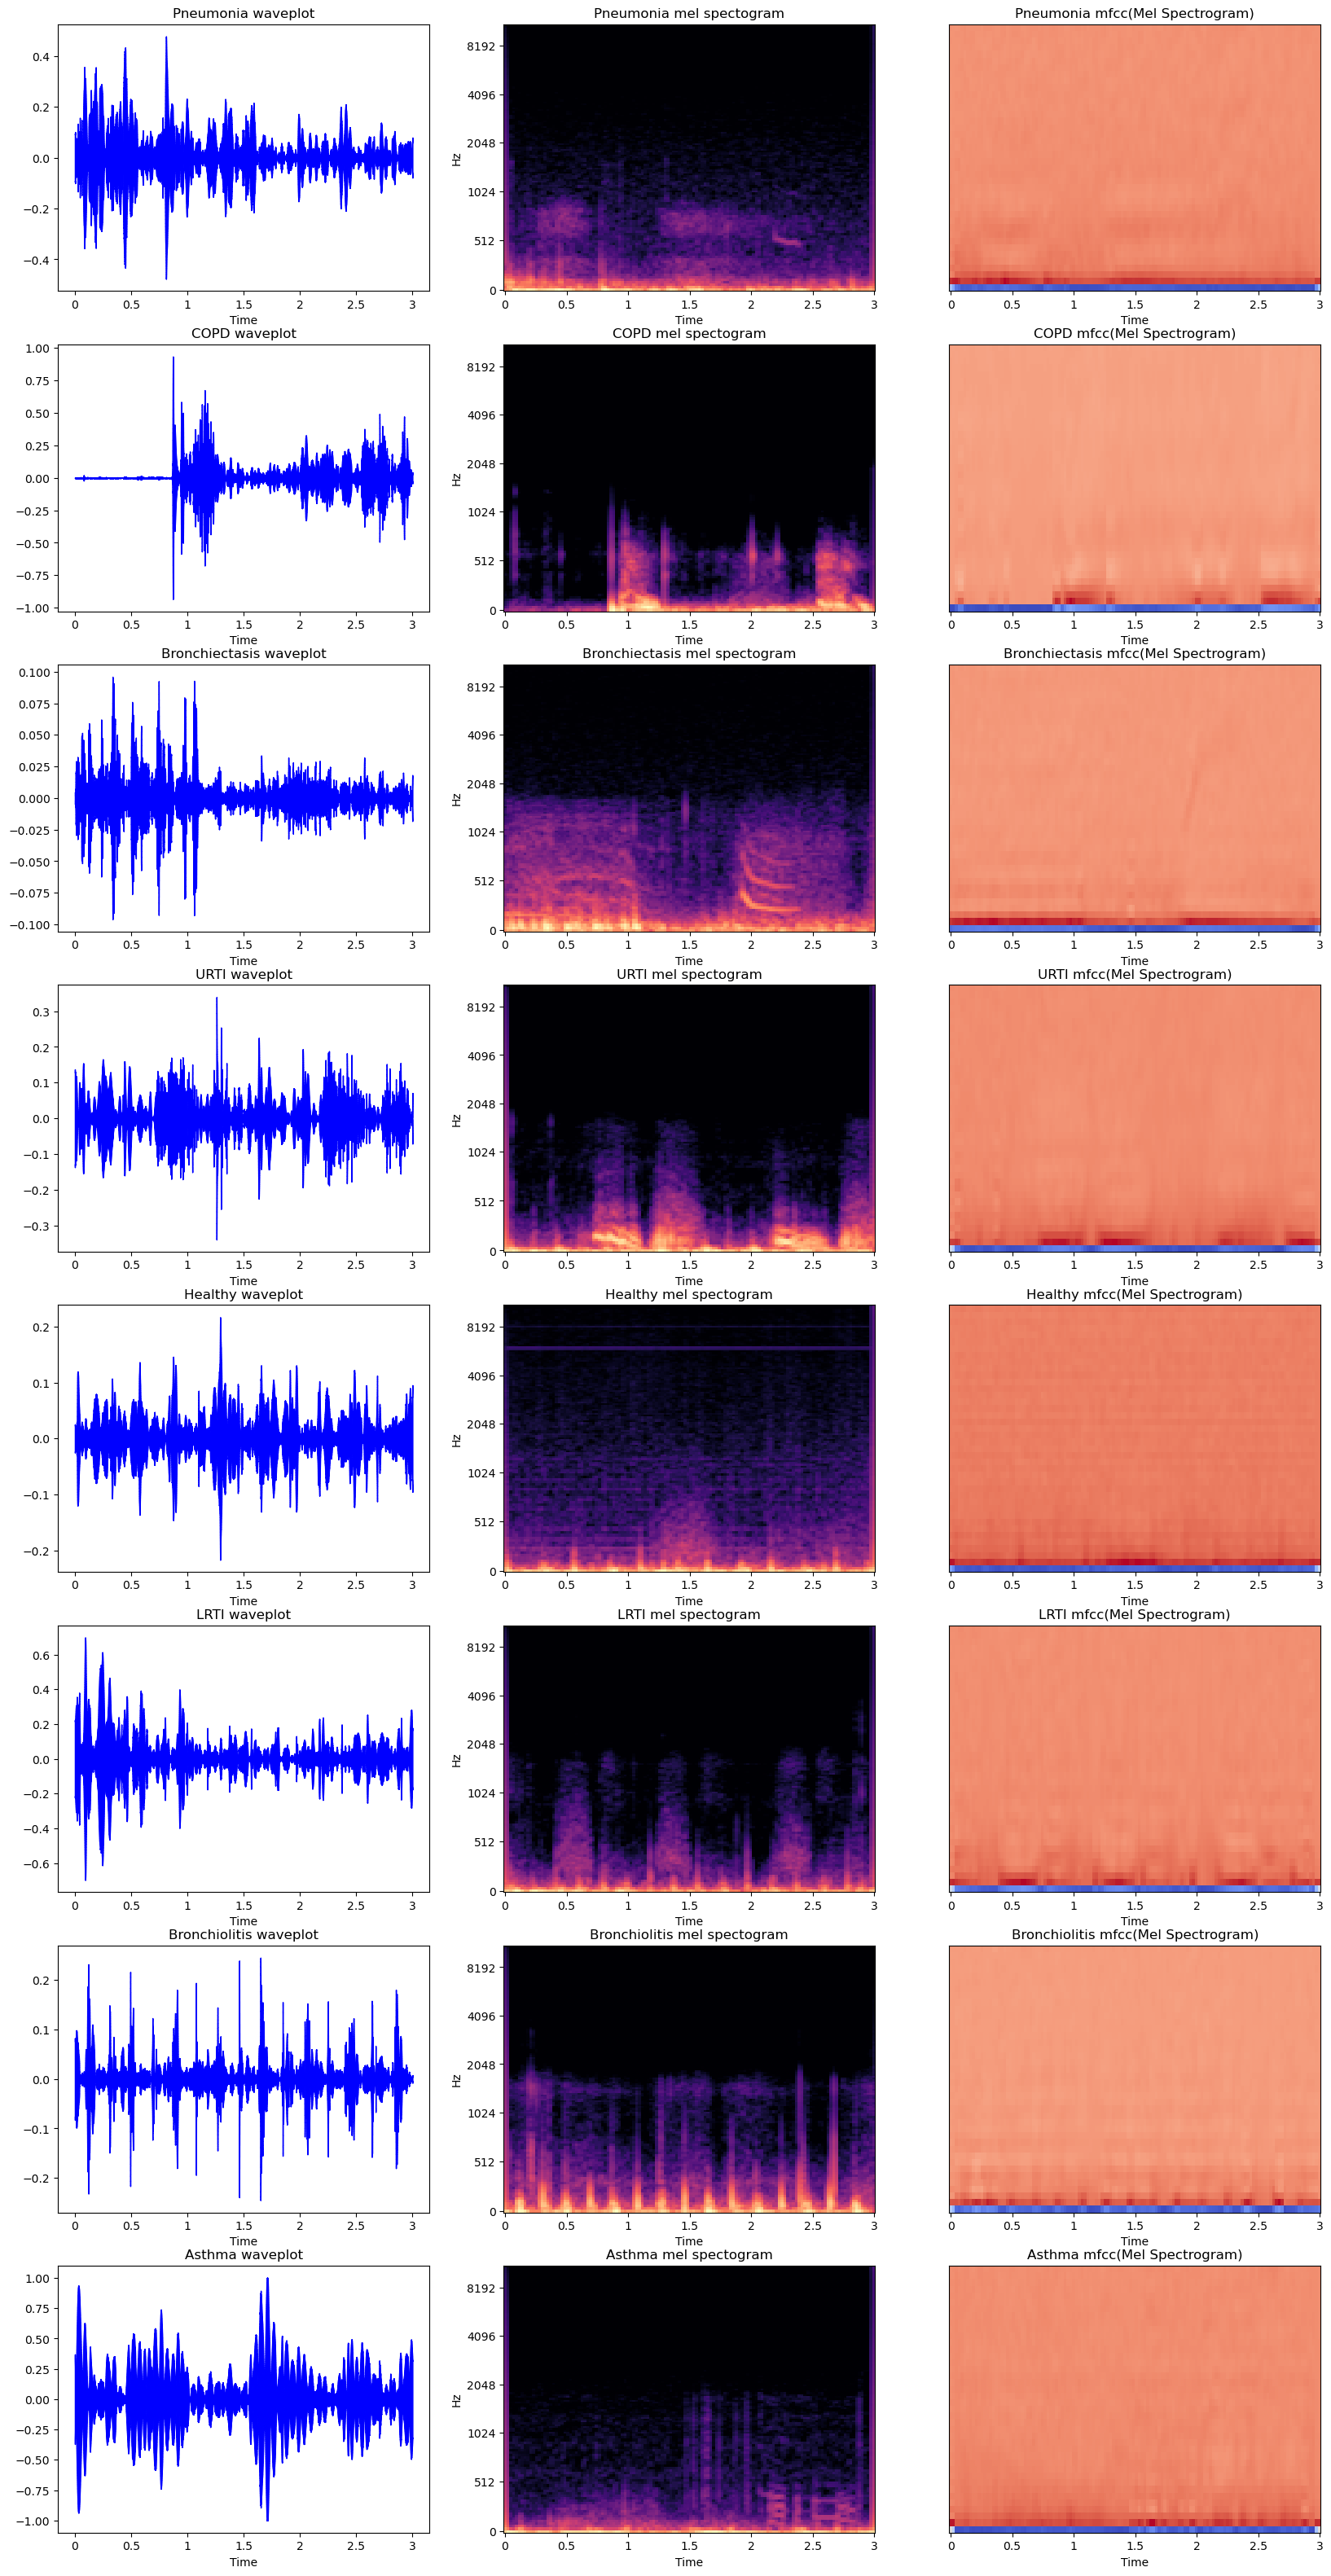

In [21]:
#Visualise some of the spectrogram features that librosa library is extracting.
plt.figure(figsize=(20,40))
idx = 0
for label in dataset.label.unique():
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[1],duration=3)
    print(dataset[dataset.label==label].filename.iloc[1])
    # Wave plot
    idx+=1
    plt.subplot(8, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveshow(y, sr=sr, color='b')
    # Mel Spectrogram
    idx+=1
    plt.subplot(8, 3, idx)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512,n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time',y_axis='mel')
    plt.title("%s mel spectogram" % label)
    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(8, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

In [25]:
# Function to extract feature vectors - Mel spectrograms are used in this study. All parameters can be optimised.
def extract_features(audio_path,offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=3)
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048,
    hop_length=512,
    n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    # mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
    return mfccs

In [23]:
#Library for plotting progress bar
from tqdm import tqdm

In [43]:
# Extracting features for all data
x_train_list = []
x_test_list = []
for idx in tqdm(range(len(train))):
    x_train_list.append(extract_features(train.filename.iloc[idx],train.offset.iloc[idx]))
for idx in tqdm(range(len(test))):
    x_test_list.append(extract_features(test.filename.iloc[idx],test.offset.iloc[idx]))
    x_test = (np.asarray(x_test_list))
    x_train = (np.asarray(x_train_list))
    # print("X train:", train.shape)
    # print("X test:", test.shape)

100%|██████████| 1793/1793 [04:17<00:00,  6.96it/s]


In [28]:
#Load Scikit Learn libraries for converting categorical data to numerical data for modeiing.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import class_weight
from tensorflow.keras.utils import to_categorical

In [44]:
# Encode Labels
encoder = LabelEncoder()
encoder.fit(train.label)
y_train = encoder.transform(train.label)
y_test = encoder.transform(test.label)
# Compute class weights
class_weights = class_weight.compute_class_weight(class_weight='balanced',classes = np.unique(y_train),y=y_train)

In [45]:
class_weights

array([128.07142857,   7.40909091,   9.63978495,   0.14337118,
         3.57171315,  68.96153846,   3.34514925,   5.40060241])

In [46]:
#Class weights corresponding to classes. CoPD has largest data and hence␣ maximum weight.
weight = {i : class_weights[i] for i in range(8)}
weight

{0: 128.07142857142858,
 1: 7.409090909090909,
 2: 9.63978494623656,
 3: 0.1433711818327203,
 4: 3.5717131474103585,
 5: 68.96153846153847,
 6: 3.345149253731343,
 7: 5.400602409638554}

In [47]:
#Reshape the data and get it ready with numerical class labels ready for␣ training.
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

X train: (7172, 40, 130, 1)
Y train: (7172, 8)
X test: (1793, 40, 130, 1)
Y test: (1793, 8)


In [33]:
# Tensorflow library especially Keras within tensorflow is used for creating deep learning model and training.
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Convolution2D, Conv2D, MaxPooling2D,GlobalAveragePooling2D

In [48]:
#Create the model framework
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]), activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))
model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())
model.add(Dense(len(encoder.classes_), activation='softmax'))
#Visualise the structure
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 39, 129, 16)       80        
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 19, 64, 16)        0         
 g2D)                                                            
                                                                 
 dropout_4 (Dropout)         (None, 19, 64, 16)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 63, 32)        2080      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 9, 31, 32)         0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 9, 31, 32)        

In [49]:
# Adam optimiser is expected to give the best performance. But others can be␣tried.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [50]:
# Train the model. Here 300 epochs are used, could try early stopping with different parameters or a shorter
# duration training to better visualise the results.
history = model.fit(x_train, y_train, batch_size=128, epochs=300,validation_data=(x_test, y_test),shuffle=True, class_weight=weight)

Epoch 1/300
57/57 [==============================] - 14s 204ms/step - loss: 7.7224 - accuracy: 0.1479 - val_loss: 1.7038 - val_accuracy: 0.7094
Epoch 2/300
57/57 [==============================] - 12s 205ms/step - loss: 2.6435 - accuracy: 0.4085 - val_loss: 1.4624 - val_accuracy: 0.7144
Epoch 3/300
57/57 [==============================] - 11s 197ms/step - loss: 1.9895 - accuracy: 0.5128 - val_loss: 1.3335 - val_accuracy: 0.7161
Epoch 4/300
57/57 [==============================] - 11s 197ms/step - loss: 1.8010 - accuracy: 0.5237 - val_loss: 1.1163 - val_accuracy: 0.7607
Epoch 5/300
57/57 [==============================] - 11s 196ms/step - loss: 1.8141 - accuracy: 0.5407 - val_loss: 0.9914 - val_accuracy: 0.8249
Epoch 6/300
57/57 [==============================] - 11s 197ms/step - loss: 1.7065 - accuracy: 0.5623 - val_loss: 1.0678 - val_accuracy: 0.7842
Epoch 7/300
57/57 [==============================] - 12s 209ms/step - loss: 1.5613 - accuracy: 0.5731 - val_loss: 0.8143 - val_accuracy:

KeyboardInterrupt: 

In [ ]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
# Model performance on test set.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
# Could look at more parameters or metrics of performance
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
# All metrics are output here.
predictions = model.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    print(classification_report(y_pred, y_true))

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels=classes)
cm_display.plot()
plt.show()

In [ ]:
# Save the model for future use.. Great idea as training takes a lot of time.
model_name = "lung.h5"
model.save(model_name)

In [ ]:
# # load model for further evaluations
from tensorflow.keras.models import load_model
model = load_model("lung.h5")

In [ ]:
# # load and evaluate the saved model
from tensorflow.keras.models import load_model
import numpy as np

# # File to be classified
classify_file = "ICBHI//ICBHI_final_database//113_1b1_Ll_sc_Litt3200.wav"
test_x = []
test_x.append(extract_features(classify_file,0.5))
test_x = np.asarray(test_x)
test_x = test_x.reshape(test_x.shape[0], test_x.shape[1], test_x.shape[2], 1)
pred = model.predict(test_x,verbose=1)
print(pred)

In [ ]:
# Predicted Class
pred_class = model.predict(test_x)
index = np.argmax(pred_class, axis=1)
print(classes[index])

In [ ]:
#check for correctness with the ground truth
actual = diagnosis.loc[diagnosis['ID'] == 113]
actual

Transfer Learning

In [ ]:
#Load the libraries
from tensorflow.keras.applications import vgg16, resnet
from tensorflow.keras.models import Model
import tensorflow.keras

In [ ]:
#VGG16
vgg = vgg16.VGG16(include_top=False, weights=None, input_shape=(x_train.shape[1],x_train.shape[2],x_train.shape[3]))
# adding our own custom made Flatten layer on top of pretrained vgg16 Conv layers
output = vgg.layers[-1].output
output = keras.layers.Flatten()(output)
vgg_model = Model(vgg.input, output)

In [ ]:
# Check out the status of all vgg layers so far
import pandas as pd
pd.set_option('max_colwidth', -1)
layers = [(layer, layer.name, layer.trainable) for layer in vgg_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

In [ ]:
# Change the structure of pre-trained model adapt it to our task which is classifying 8 respiratory diseases.
# Hence 8 neurons in the final layer.
modelvgg = Sequential()
modelvgg.add(vgg_model)
modelvgg.add(Dense(512, activation='relu'))
modelvgg.add(Dense(len(encoder.classes_), activation='softmax'))
modelvgg.summary()

In [ ]:
# Again parameters and hyperparameters can be optimised. Here Adam optimiser is used.
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
modelvgg.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')

In [ ]:
# Train the models. 150 epochs might be too long. Could try shorter duration to analyse results.
# Try early stopping criterias.
history_vgg = modelvgg.fit(x_train, y_train,batch_size=128,epochs=150,validation_data=(x_test, y_test),shuffle=True)

In [ ]:
# Loss Curves
plt.figure(figsize=[14,10])
plt.subplot(211)
plt.plot(history_vgg.history['loss'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_loss'],'#1f77b4',linewidth=3.0)
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
# Accuracy Curves
plt.figure(figsize=[14,10])
plt.subplot(212)
plt.plot(history_vgg.history['accuracy'],'#d62728',linewidth=3.0)
plt.plot(history_vgg.history['val_accuracy'],'#1f77b4',linewidth=3.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [ ]:
#Evaluate the test scores.
scores = modelvgg.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

In [ ]:
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [ ]:
#Look at the complete report.
predictions = modelvgg.predict(x_test, verbose=1)
y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions):
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    print(classification_report(y_pred, y_true))

In [ ]:
import matplotlib.pyplot as plt
import numpy
from sklearn import metrics
# Check which classes are confused.
confusion_matrix = metrics.confusion_matrix(y_true, y_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix =confusion_matrix, display_labels=classes)
cm_display.plot()
plt.show()